In [1]:
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import shapiro

from eff.analysis import mann_whitney_test, wilcoxon_signed_rank_test, get_significance_level
from eff.analysis.plotting import set_lang_ax
from eff.util.util import load_results

In [2]:
base_path = Path("./out/nelex_unique")
dataset, res, criterion, model = load_results(base_path, 'hun')
fontsize=18

In [3]:
# harmonic groups. if neutral vowels are grouped with front vowels, they need to be exlcuded when
# calculating feature surprisal after +BACK vowels, since they are still neutral in that condition.
front_vowels = ['ø', 'y']
back_vowels = ['o', 'u', 'ɒ', 'a']
neutral_vowels = ['i', 'ɛ', 'e']

In [4]:
# model probe front harmony (feature surprisal)
clts_ds = dataset['clts']
bipa = clts_ds.bipa
output_alphabet = clts_ds.output_alphabet
logprobs = res['unmasked']['logprobs']
targets = res['unmasked']['targets']
target_indices = res['unmasked']['indices']

front_indices = [output_alphabet.char2idx(v) for v in front_vowels]
back_indices = [output_alphabet.char2idx(v) for v in back_vowels]
neutral_indices = [output_alphabet.char2idx(v) for v in neutral_vowels]


ff_surprisal = []
fb_surprisal = []
bb_surprisal = []
bf_surprisal = []
nf_surprisal = []
nb_surprisal = []
nn_surprisal = []

fnf_surprisal = []
fnb_surprisal = []
bnb_surprisal = []
bnf_surprisal = []
nnf_surprisal = []
nnb_surprisal = []
nnn_surprisal = []


for indices_word, targets_word, logprobs_word in zip(target_indices, targets, logprobs):
    vowel_indices = [targets_word[idx] for idx in indices_word]
    if len(vowel_indices) >= 2:
        for i in range(len(vowel_indices)-1, 0, -1):
            i1, i2 = vowel_indices[i-1], vowel_indices[i]
            # need char to determine harmonic group
            v1, v2 = output_alphabet.idx2char(i1), output_alphabet.idx2char(i2)
            target_idx = indices_word[i]

            if not clts_ds.bipa[v1].type == 'diphthong' \
            and not clts_ds.bipa[v2].type == 'diphthong':

                # front
                if v1 in front_vowels:
                    target_logprobs = logprobs_word[target_idx]
                    harmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in front_indices])
                    disharmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in back_indices])
                    harmonic_surprisal = -np.log2(harmonic_surprisal)
                    disharmonic_surprisal = -np.log2(disharmonic_surprisal)
                    ff_surprisal.append(harmonic_surprisal)
                    fb_surprisal.append(disharmonic_surprisal)
                # neutral
                if v1 in neutral_vowels:
                    target_logprobs = logprobs_word[target_idx]
                    harmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in front_indices])
                    disharmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in back_indices])
                    neutral_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in neutral_indices])
                    harmonic_surprisal = -np.log2(harmonic_surprisal)
                    disharmonic_surprisal = -np.log2(disharmonic_surprisal)
                    neutral_surprisal = -np.log2(neutral_surprisal)
                    nf_surprisal.append(harmonic_surprisal)
                    nb_surprisal.append(disharmonic_surprisal)
                    nn_surprisal.append(neutral_surprisal)
                # back
                elif v2 in back_vowels:
                    target_logprobs = logprobs_word[target_idx]
                    harmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in back_indices])
                    disharmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in front_indices])
                    harmonic_surprisal = -np.log2(harmonic_surprisal)
                    disharmonic_surprisal = -np.log2(disharmonic_surprisal)
                    bb_surprisal.append(harmonic_surprisal)
                    bf_surprisal.append(disharmonic_surprisal)

    if len(vowel_indices) >= 3:
        for i in range(len(vowel_indices)-1, 0, -1):
            i1, i2, i3 = vowel_indices[i-2], vowel_indices[i-1], vowel_indices[i]
            v1, v2, v3 = output_alphabet.idx2char(i1), output_alphabet.idx2char(i2), output_alphabet.idx2char(i3)
            target_idx = indices_word[i]

            if not clts_ds.bipa[v1].type == 'diphthong' \
            and not clts_ds.bipa[v2].type == 'diphthong' \
            and not clts_ds.bipa[v3].type == 'diphthong':
            
                if v1 in front_vowels and v2 in neutral_vowels:
                    target_logprobs = logprobs_word[target_idx]
                    harmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in front_indices])
                    disharmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in back_indices])
                    harmonic_surprisal = -np.log2(harmonic_surprisal)
                    disharmonic_surprisal = -np.log2(disharmonic_surprisal)
                    fnf_surprisal.append(harmonic_surprisal)
                    fnb_surprisal.append(disharmonic_surprisal)

                elif v1 in back_vowels and v2 in neutral_vowels:
                    target_logprobs = logprobs_word[target_idx]
                    harmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in back_indices])
                    disharmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in front_indices])
                    harmonic_surprisal = -np.log2(harmonic_surprisal)
                    disharmonic_surprisal = -np.log2(disharmonic_surprisal)
                    bnb_surprisal.append(harmonic_surprisal)
                    bnf_surprisal.append(disharmonic_surprisal)

                elif v1 in neutral_vowels and v2 in neutral_vowels:
                    target_logprobs = logprobs_word[target_idx]
                    harmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in front_indices])
                    disharmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in back_indices])
                    neutral_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in neutral_indices])
                    harmonic_surprisal = -np.log2(harmonic_surprisal)
                    disharmonic_surprisal = -np.log2(disharmonic_surprisal)
                    neutral_surprisal = -np.log2(neutral_surprisal)
                    nnf_surprisal.append(harmonic_surprisal)
                    nnb_surprisal.append(disharmonic_surprisal)
                    nnn_surprisal.append(neutral_surprisal)

                
n_ff = len(ff_surprisal)
n_fb = len(fb_surprisal)
n_bb = len(bb_surprisal)
n_bf = len(bf_surprisal)
n_nf = len(nf_surprisal)
n_nb = len(nb_surprisal)
n_nn = len (nn_surprisal)

n_fnf = len(fnf_surprisal)
n_fnb = len(fnb_surprisal)
n_bnb = len(bnb_surprisal)
n_bnf = len(bnf_surprisal)
n_nnf = len(nnf_surprisal)
n_nnb = len(nnb_surprisal)
n_nnn = len(nnn_surprisal)

harmonic_surprisal = ff_surprisal + bb_surprisal
disharmonic_surprisal = fb_surprisal + bf_surprisal

delta_mean_f = np.mean(ff_surprisal) - np.mean(fb_surprisal)
delta_mean_b = np.mean(bb_surprisal) - np.mean(bf_surprisal)
delta_mean_n = np.mean(nf_surprisal) - np.mean(nb_surprisal)
delta_mean_disharmonic2 = np.mean(fb_surprisal) - np.mean(bf_surprisal)
print(delta_mean_f)
print(delta_mean_b)
print(delta_mean_disharmonic2)

delta_mean_fn = np.mean(fnf_surprisal) - np.mean(fnb_surprisal)
print(delta_mean_fn)
delta_mean_bn = np.mean(bnb_surprisal) - np.mean(bnf_surprisal)
print(delta_mean_bn)
delta_mean_nn = np.mean(nnf_surprisal) - np.mean(nnb_surprisal)
print(delta_mean_nn)
delta_mean_disharmonic3 = np.mean(fnb_surprisal) - np.mean(bnf_surprisal)

-0.09166849639513686
-2.1994800795570124
-1.0805857764806013
0.08637290476457204
-1.6035971853590327
0.4452662216858212


In [5]:
print(shapiro(harmonic_surprisal))
print(shapiro(disharmonic_surprisal))

print(shapiro(ff_surprisal))
print(shapiro(fb_surprisal))
print(shapiro(bb_surprisal))
print(shapiro(bf_surprisal))

ShapiroResult(statistic=0.8789243698120117, pvalue=1.004589633701869e-09)
ShapiroResult(statistic=0.9375091791152954, pvalue=3.4355628031335073e-06)
ShapiroResult(statistic=0.912926197052002, pvalue=0.010249797254800797)
ShapiroResult(statistic=0.9505547285079956, pvalue=0.1275792121887207)
ShapiroResult(statistic=0.8422486186027527, pvalue=8.787667260534704e-10)
ShapiroResult(statistic=0.976564347743988, pvalue=0.03966232016682625)


In [6]:
# harmonic vs. disharmonic 
res = mann_whitney_test(harmonic_surprisal, disharmonic_surprisal)
print(res)

res = mann_whitney_test(fnf_surprisal+bnb_surprisal, fnb_surprisal+bnf_surprisal)
print(res)

print(np.mean(nf_surprisal+nb_surprisal) - np.mean(nn_surprisal))
res = mann_whitney_test(nf_surprisal+nb_surprisal, nn_surprisal)
print(res)

print(np.mean(nnf_surprisal+nnb_surprisal) - np.mean(nnn_surprisal))
res = mann_whitney_test(nnf_surprisal+nnb_surprisal, nnn_surprisal)
print(res)

(935.0, 6.730524103859311e-43, -0.9168888888888889)
(78.0, 0.00824611159729866, -0.5185185185185186)
0.40318221929834297
(27187.0, 9.853582612374525e-11, 0.38709183673469383)
0.6349894559829492
(3387.0, 2.0835338550855048e-10, 0.6725925925925926)


In [7]:
# harmonic vs. disharmonic 
res = mann_whitney_test(harmonic_surprisal, disharmonic_surprisal)
print(res)

(935.0, 6.730524103859311e-43, -0.9168888888888889)


In [8]:
# 2 vowels
U, p_value_f, r = wilcoxon_signed_rank_test(ff_surprisal, fb_surprisal)
print("f\_f/f\_b & {} &  {} & {} & {} & Wilcoxon \\\\"
    .format(round(delta_mean_f, 4), U, p_value_f, round(r, 4)))
U, p_value_b, r = wilcoxon_signed_rank_test(bb_surprisal, bf_surprisal)
print("b\_b/b\_f & {} & {} & {} & {} & Wilcoxon \\\\"
    .format(round(delta_mean_b, 4), U, p_value_b, round(r, 4)))
U, p_value_n, r = wilcoxon_signed_rank_test(nf_surprisal, nb_surprisal)
print("n\_f/n\_b & {} & {} & {} & {} & Wilcoxon \\\\"
    .format(round(delta_mean_n, 4), U, p_value_n, round(r, 4)))
U, p_value, r = mann_whitney_test(fb_surprisal, bf_surprisal)
print("f\_b/b\_f & {} & {} & {} & {} & Mann-Whitney \\\\"
    .format(round(delta_mean_disharmonic2, 4), U, p_value, round(r, 4)))

f\_f/f\_b & -0.0917 &  270.0 & 0.6382326052607894 & 0.4538 & Wilcoxon \\
b\_b/b\_f & -2.1995 & 2.0 & 9.464917774161585e-21 & 0.0003 & Wilcoxon \\
n\_f/n\_b & 0.7951 & 1270.0 & 2.4684531960832072e-14 & 0.1287 & Wilcoxon \\
f\_b/b\_f & -1.0806 & 364.0 & 5.360898381484825e-13 & -0.8154 & Mann-Whitney \\


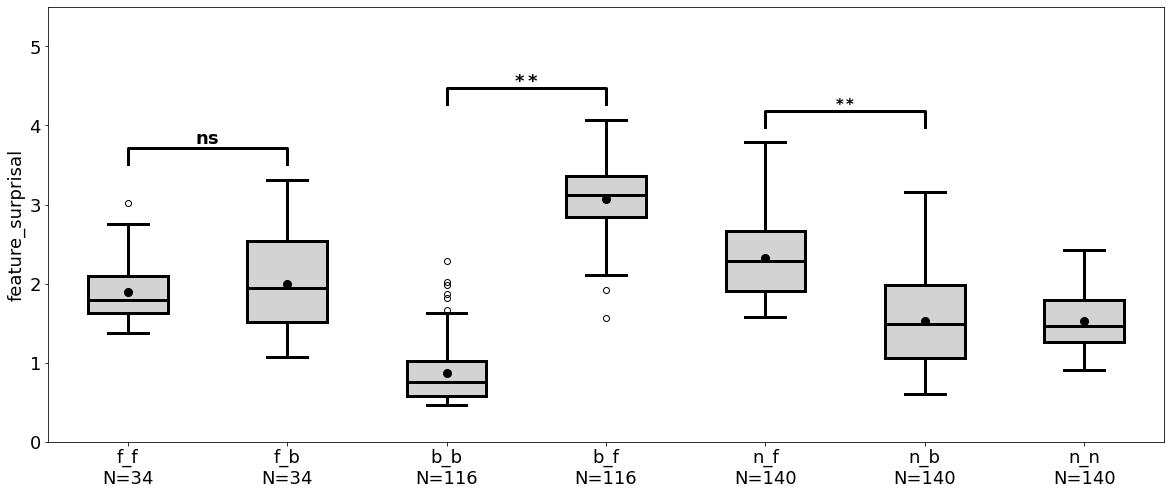

In [9]:
fig = plt.figure(figsize=(20, 8))
gs = fig.add_gridspec(1, 1, hspace=0.15, wspace=0.25)
ax = gs.subplots()

ax.set_ylim([0,5.5])

data = [
    ff_surprisal, 
    fb_surprisal, 
    bb_surprisal, 
    bf_surprisal,
    nf_surprisal, 
    nb_surprisal,
    nn_surprisal
]

xlabels = [
    "f_f\nN={}".format(n_ff),
    "f_b\nN={}".format(n_fb),
    "b_b\nN={}".format(n_bb),
    "b_f\nN={}".format(n_bf),
    "n_f\nN={}".format(n_nf),
    "n_b\nN={}".format(n_nb),
    "n_n\nN={}".format(n_nn)
]

set_lang_ax(ax, data, xlabels, 
    # title='Finnish',
    title=None,
    ylabel=r"feature_surprisal",
    boxcolor='lightgrey',
    fontsize=18
)

# significance front harmony violation
level = get_significance_level(p_value_f)
x1, x2 = 1, 2
y, h, col = max(fb_surprisal + ff_surprisal) + 0.2, 0.2, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=3, c=col)
plt.text((x1+x2)*.5, y+h, level, ha='center', va='bottom', color=col, fontsize=18)

# significance back harmony violation
level = get_significance_level(p_value_b)
x1, x2 = 3, 4
y, h, col = max(bb_surprisal + bf_surprisal) + 0.2, 0.2, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=3, c=col)
plt.text((x1+x2)*.5, y+h, level, ha='center', va='bottom', color=col, fontsize=18)

# significance neutral harmonic/disharmonic violation
level = get_significance_level(p_value_n)
x1, x2 = 5, 6
y, h, col = max(nf_surprisal) + 0.2, 0.2, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=3, c=col)
plt.text((x1+x2)*.5, y+h, level, ha='center', va='bottom', color=col, fontsize=15)

# plt.savefig("../img/surprisal_front_neutral_harmony_fin.png",
plt.savefig("../img/surprisal_front2_harmony_hun.png",
        bbox_inches='tight',
        pad_inches=0,
        format='png',
        dpi=300)

In [10]:
# 3 vowels
U, p_value_fn, r = wilcoxon_signed_rank_test(fnf_surprisal, fnb_surprisal)
print("f\_n\_f/f\_n\_b & {} &  {} & {} & {} & Wilcoxon \\\\"
    .format(round(delta_mean_fn, 4), U, p_value_fn, round(r, 4)))
U, p_value_bn, r = wilcoxon_signed_rank_test(bnb_surprisal, bnf_surprisal)
print("b\_n\_b/b\_n\_f & {} & {} & {} & {} & Wilcoxon \\\\"
    .format(round(delta_mean_bn, 4), U, p_value_bn, round(r, 4)))
U, p_value_nn, r = wilcoxon_signed_rank_test(nnf_surprisal, nnb_surprisal)
print("n\_n\_f/n\_n\_b & {} & {} & {} & {} & Wilcoxon \\\\"
    .format(round(delta_mean_nn, 4), U, p_value_nn, round(r, 4)))
U, p_value, r = mann_whitney_test(fnb_surprisal, bnf_surprisal)
print("f\_n\_b/b\_n\_f & {} & {} & {} & {} & Mann-Whitney \\\\"
    .format(round(delta_mean_disharmonic3, 4), U, p_value, round(r, 4)))

f\_n\_f/f\_n\_b & 0.0864 &  27.0 & 1.0 & 0.4909 & Wilcoxon \\
b\_n\_b/b\_n\_f & -1.6036 & 0.0 & 0.0078125 & 0.0 & Wilcoxon \\
n\_n\_f/n\_n\_b & 0.4453 & 243.0 & 0.0019446601098029746 & 0.2348 & Wilcoxon \\
f\_n\_b/b\_n\_f & -0.674 & 24.0 & 0.17281411399058458 & -0.4 & Mann-Whitney \\


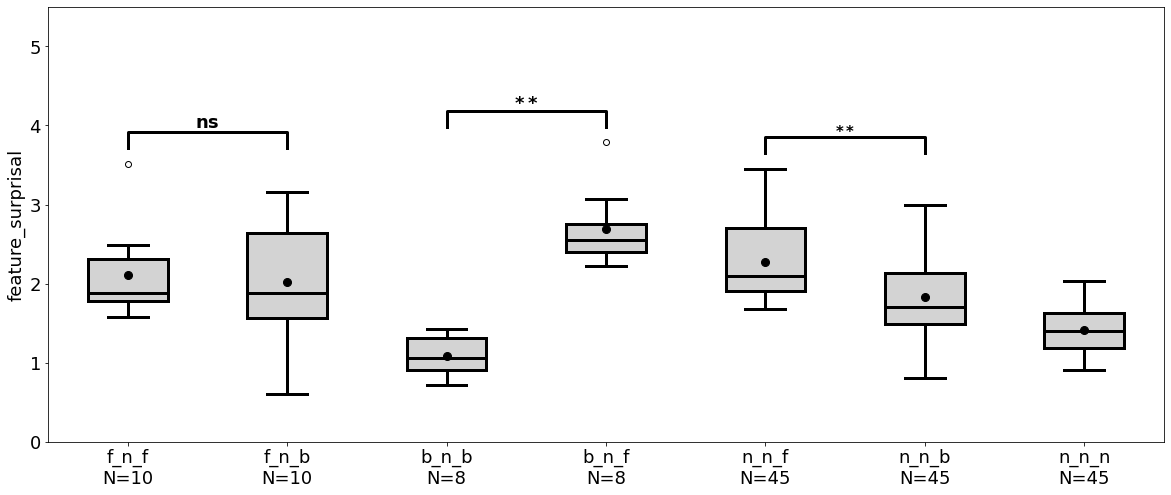

In [11]:
fig = plt.figure(figsize=(20, 8))
gs = fig.add_gridspec(1, 1, hspace=0.15, wspace=0.25)
ax = gs.subplots()

ax.set_ylim([0,5.5])

data = [
    fnf_surprisal, 
    fnb_surprisal, 
    bnb_surprisal, 
    bnf_surprisal,
    nnf_surprisal, 
    nnb_surprisal,
    nnn_surprisal
]

xlabels = [
    "f_n_f\nN={}".format(n_fnf),
    "f_n_b\nN={}".format(n_fnb),
    "b_n_b\nN={}".format(n_bnb),
    "b_n_f\nN={}".format(n_bnf),
    "n_n_f\nN={}".format(n_nnf),
    "n_n_b\nN={}".format(n_nnb),
    "n_n_n\nN={}".format(n_nnn)
]

set_lang_ax(ax, data, xlabels, 
    # title='Finnish',
    title=None,
    ylabel=r"feature_surprisal",
    boxcolor='lightgrey',
    fontsize=18
)

# significance front harmony violation
level = get_significance_level(p_value_fn)
x1, x2 = 1, 2
y, h, col = max(fnb_surprisal + fnf_surprisal) + 0.2, 0.2, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=3, c=col)
plt.text((x1+x2)*.5, y+h, level, ha='center', va='bottom', color=col, fontsize=18)

# significance back harmony violation
level = get_significance_level(p_value_bn)
x1, x2 = 3, 4
y, h, col = max(bnb_surprisal + bnf_surprisal) + 0.2, 0.2, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=3, c=col)
plt.text((x1+x2)*.5, y+h, level, ha='center', va='bottom', color=col, fontsize=18)

# significance neutral harmonic/disharmonic violation
level = get_significance_level(p_value_nn)
x1, x2 = 5, 6
y, h, col = max(nnf_surprisal + nnb_surprisal) + 0.2, 0.2, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=3, c=col)
plt.text((x1+x2)*.5, y+h, level, ha='center', va='bottom', color=col, fontsize=15)

# plt.savefig("../img/surprisal_front_neutral_harmony_fin.png",
plt.savefig("../img/surprisal_front3_harmony_hun.png",
        bbox_inches='tight',
        pad_inches=0,
        format='png',
        dpi=300)

In [12]:
# all-neutral vs non-neutral

U, p_value, r = wilcoxon_signed_rank_test(nnf_surprisal, nnn_surprisal)
print(np.mean(nnn_surprisal) - np.mean(nnf_surprisal))
print(U, p_value, r)

U, p_value, r = wilcoxon_signed_rank_test(nnb_surprisal, nnn_surprisal)
print(np.mean(np.mean(nnn_surprisal) - nnb_surprisal))
print(U, p_value, r)

-0.8576225668258592
0.0 5.172027480629306e-09 0.0
-0.41235634514003816
258.0 0.0033979600256322465 0.2492753623188406
